# LOSS VISUALIZER

The loss ploted in this notebook is the cross entropy loss of the model. It must be said that due to using different training datasets the steps between 1470 and 6930 will be not displayed as it comes from a different text. The decision of just plotting this data is that the text from the dataset was used in the first and last epochs of the training.

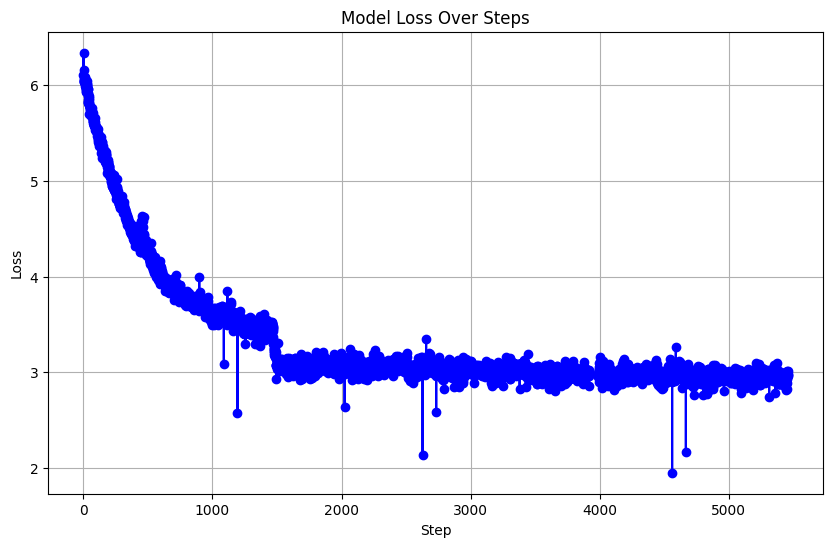

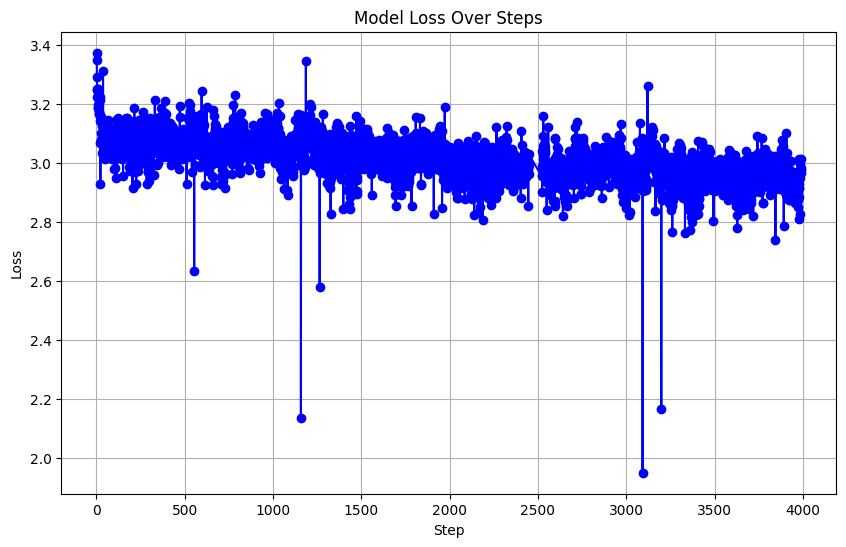

In [11]:
import matplotlib.pyplot as plt

# Open the log file and read lines
with open('output.txt', 'r') as file:
    lines = file.readlines()

steps = []
final_steps = []
losses = []
final_losses = []

# Process each line in the log file
for line in lines:
    parts = line.split('|')
    if len(parts) < 2:
        continue  # Skip lines that don't have the expected format

    step_part = parts[0].strip()
    loss_part = parts[1].strip()
    
    step = int(step_part.split()[1])
    loss = float(loss_part.split(':')[1].strip())  # Changed to split()[1] to handle the correct part of the loss

    if step <= 1470:
        steps.append(step)
        losses.append(loss)
    elif step > 6930:
        steps.append(step-5460)
        final_steps.append(step-6930)
        losses.append(loss)
        final_losses.append(loss)


for plot, loss in [(steps, losses), (final_steps, final_losses)]:
    plt.figure(figsize=(10, 6))
    plt.plot(plot, loss, marker='o', linestyle='-', color='b')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Model Loss Over Steps')
    plt.grid(True)
    plt.show()